# getCFI_Ridge_sim

This file generates cumulaitve ridge importance for simulated traits.

At the end of the file, we also include analysis of cumulative true phenotypic variance using true effect sizes.

In [2]:
import numpy as np
import pandas as pd
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Cumulative ridge importance all traits sim

<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gard_\AppData\Local\Temp\ipykernel_5660\3676054227.py:40: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(x, cumulative_importance, color=cmap(idx), label=f"$\pi_0$ = {pi_0:.2f}")


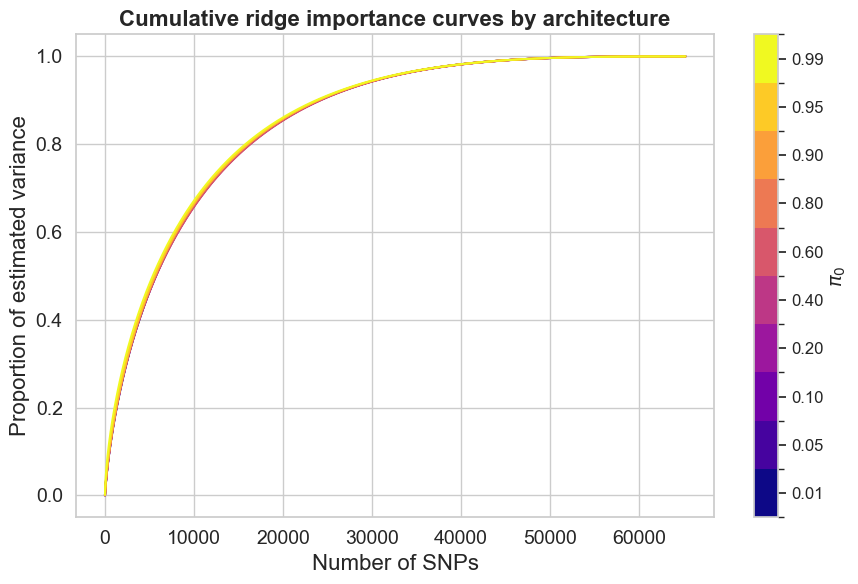

In [3]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Architecture and corresponding pi_0 values
arch_values = list(range(1, 11))
pi_0_values = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99]

# Load genotype data once
data = pd.read_feather("c:/Users/gard_/Documents/MasterThesis/Code/Data/SNP1_70k.feather")
X_full = data.drop("ringnr", axis=1).fillna(0).astype('int64')

# Set up plot
fig, ax = plt.subplots(figsize=(9, 6))

# Create discrete plasma colormap
colors = cm.plasma(np.linspace(0, 1, 10))
cmap = mcolors.ListedColormap(colors)
bounds = np.linspace(0.5, 10.5, 11)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Loop over all architectures
for idx, (arch, pi_0) in enumerate(zip(arch_values, pi_0_values)):
    # Load ridge coefficients
    coef_path = f'C:/Users/gard_/Documents/MasterThesis/Code/Results/70k/Ridge/ridge_coefs_arch{arch}.csv'
    coef_df = pd.read_csv(coef_path)

    # Align SNPs
    coef_df = coef_df[coef_df['SNP'].isin(X_full.columns)].copy()
    X = X_full[coef_df['SNP'].values]  # re-order X to match coef_df
    assert all(coef_df['SNP'].values == X.columns.values), f"SNPs not aligned for arch {arch}"

    # Compute variance-based importance
    var_X = X.var(axis=0).values
    var_term = (coef_df['beta_R'].values ** 2) * var_X
    var_term = -np.sort(-var_term) / np.sum(var_term)
    cumulative_importance = np.cumsum(var_term)

    # Plot curve with colormap
    x = np.arange(len(cumulative_importance))
    ax.plot(x, cumulative_importance, color=cmap(idx), label=f"$\pi_0$ = {pi_0:.2f}")

# Labels and title
ax.set_title("Cumulative ridge importance curves by architecture", fontsize=16, weight="bold")
ax.set_xlabel("Number of SNPs", fontsize=16)
ax.set_ylabel("Proportion of estimated variance", fontsize=16)
ax.tick_params(axis='both', labelsize=14)

# Discrete colorbar for π₀
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), ticks=range(1, 11), ax=ax)
cbar.ax.set_yticklabels([f"{p:.2f}" for p in pi_0_values])
cbar.set_label(r'$\pi_0$', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Finalize and save
plt.tight_layout()
plt.savefig("C:/Users/gard_/Documents/MasterThesis/Code/Figures/CFI_ridge_sim.pdf", dpi=300, bbox_inches="tight")
plt.show()

# Cumulative true phenotypic variance

<>:41: SyntaxWarning: invalid escape sequence '\p'
<>:41: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gard_\AppData\Local\Temp\ipykernel_22276\871584909.py:41: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(x, cumulative_importance, color=cmap(idx), label=f"$\pi_0$ = {pi_0:.2f}")
C:\Users\gard_\AppData\Local\Temp\ipykernel_22276\871584909.py:41: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(x, cumulative_importance, color=cmap(idx), label=f"$\pi_0$ = {pi_0:.2f}")


KeyboardInterrupt: 

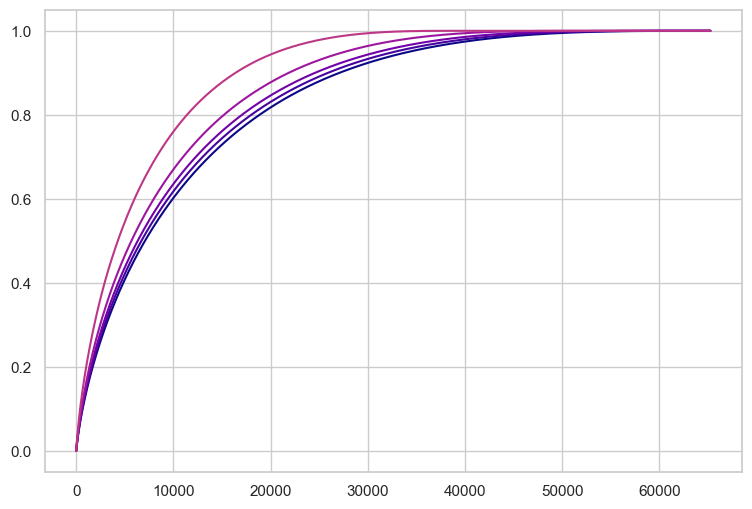

In [3]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Architecture and corresponding pi_0 values
arch_values = list(range(1, 11))
pi_0_values = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99]


# Load genotype data once
data = pd.read_feather("c:/Users/gard_/Documents/MasterThesis/Code/Data/SNP1_70k.feather")
X_full = data.drop("ringnr", axis=1).fillna(0).astype('int64')

# Set up plot
fig, ax = plt.subplots(figsize=(9, 6))

# Create discrete plasma colormap
colors = cm.plasma(np.linspace(0, 1, 10))
cmap = mcolors.ListedColormap(colors)
bounds = np.linspace(0.5, 10.5, 11)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Loop over all architectures
for idx, (arch, pi_0) in enumerate(zip(arch_values, pi_0_values)):
    # Load ridge coefficients
    effects_path = f'c:/Users/gard_/Documents/MasterThesis/Code/Data/Phenotypes/70k/Sim_effect_70k_arch_{arch}.csv'
    effects_df = pd.read_csv(effects_path)

    # Align SNPs
    effects_df = effects_df[effects_df['SNP'].isin(X_full.columns)].copy()
    X = X_full[effects_df['SNP'].values]  # re-order X to match coef_df
    assert all(effects_df['SNP'].values == X.columns.values), f"SNPs not aligned for arch {arch}"

    # Compute variance-based importance
    var_X = X.var(axis=0).values
    var_term = (effects_df['effect'].values ** 2) * var_X
    var_term = -np.sort(-var_term) / np.sum(var_term)
    cumulative_importance = np.cumsum(var_term)

    # Plot curve with colormap
    x = np.arange(len(cumulative_importance))
    ax.plot(x, cumulative_importance, color=cmap(idx), label=f"$\pi_0$ = {pi_0:.2f}")

# Labels and title
ax.set_title("Cumulative phenotypic variance over SNPs", fontsize=16, weight="bold")
ax.set_xlabel("Number of SNPs", fontsize=16)
ax.set_ylabel("Proportion of total effect", fontsize=16)
ax.tick_params(axis='both', labelsize=14)

# Discrete colorbar for π₀
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), ticks=range(1, 11), ax=ax)
cbar.ax.set_yticklabels([f"{p:.2f}" for p in pi_0_values])
cbar.set_label(r'$\pi_0$', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Finalize and save
plt.tight_layout()
plt.savefig("C:/Users/gard_/Documents/MasterThesis/Code/Figures/Cumulative_variance.pdf", dpi=300, bbox_inches="tight")
plt.show()